# 信息因果模型

现在流行的因果模型框架 Structural Causal Models, Causal DAGs, Potential Outcome, Indicator Regime 底层的模型都是概率图模型。他们的底层假设是给定 $n$ 个全局随机变量某种形式的联合分布，变量之间有因果关系，参见 [Handbook of Graphical Models(2018)](https://colab.research.google.com/drive/1m8bHbsToIP8M41o0IL55AuXLzKSLaTPa)。我们的因果模型与这些现存框架截然不同：

- Causality as information transfer。
- 每个样本都可以有不同的因果图，其样本因果图由信息传播的门控决定。
- 我们倾向使用 $\sigma$-intervention，而不是 $do$-intervention.

## 因果建模框架概览

**Seeing VS Doing.**

- $do$-calculus.

This do-intervention is called an atomic intervention as it affects a single variable that is being set to a specific value. 

- *Regime indicator.*
    - We consider the above 'seeing' and 'doing' as two types of regimes, a natural one and a set of interventional ones. $p(x; \sigma = s) = p(x; s)$. Here, regimes refer to external circumstances under which we expect some aspects of the joint distribution of X to differ.
    - $p(x; \sigma = \tilde{p}_X)$ describes the behavior of the outcome $Y$ when $X$ is drawn from the distribution $\tilde{p}_X$. Another important type of regimes is given by conditional or dynamic interventions. Here, we may want to force $X$ to take on a value that is a specified function $g_X$ of pre-exposure covariates $C$. The purpose is to reflect, for example, a treatment strategy that is adapted to the patient's history.  $p(x|C=c, \sigma = g_X) = I_{x = g_X(c)}$
    
- *Potential outcomes.*

A third notation in the context of causal inference uses potential outcomes. If, as above, we want to consider some causal effect of $X$ on an outcome $Y$, we define the potential outcome $Y(\tilde{x})$ to be the value of $Y$ that we would observe if $X$ were set (forced) to $\tilde{x}$. Hence this approach is essentially based on atomic interventions. Similar to before, the possibility that $p(Y(x) = y)$ does not equal $p(y|x)$ allows us to express that causation is not association.

*Causal DAGs.* 

Consider a DAG $G = (V, E)$ and a random vector $X = (X_1, ..., X_K)$ with distribution $p$. Then $G$ is called a causal DAG for $X$ if $p$ satisfies the following:

(i) $p$ factorizes, and thus is Markov, according to $G$, and 

(ii) for any $A \subseteq V$ and any $\tilde{x}_A, x_B$ in the domains of $X_A, X_B$, $B=V/A$,

$$p(x; do(\tilde{x}_A)) = \Pi_{k \in V} p(x_k|x_{Pa(k)})\Pi_{j \in A}I(x_j = \tilde{x}_j)$$



Pearl's Causal Diagrams, 因果建模的主要模型就是 Structural Causal Models, 简单说就是假定知道了变量之间的因果关系，然用用结构方程来定义赋值机制。At the center of the structural theory of causation lies a "structural model" $M$, consisting of two sets of variables,$U$ and $V$, and a set $F$ of functions that determine or simulate how values are assigned to each variable $V_i\in V$.  Thus for example, the equation 

$$v_i=f_i(v;u)$$

describes a physical process by  which variable $V_i$ is assigned the value $v_i=f_i(v;u)$ in response to the current values, $v$ and $u$, of all variables in $V$ and $U$. Formally,  the triplet $< U;V;F>$ defines a SCM, and the diagram that captures the relationships among the variables is called thecausal graph $G$(of $M$).  

*The role of graphs.* 

- 观测数据的因果推断一般 relies on assumptions that are somewhat different in their nature, and arguably stronger, that those for traditional statistical inference. Only a thorough understanding of these assumptions, and indeed of the causal target of inference itself, enables us to come up with ways of checking them either empirically or based on subject matter plausibility. 
- Graphical approaches assist us with formalizing causal targets of inference. Moreover, they have proved especially useful  for being transparent and general about the assumptions required for causal conclusions. 因此他们帮助 facilitate the detection and elimination of possible sources of bias, or suggest specific sensitivity analysis. 
- Graphical and causal modeling can be combined in many ways resulting in differing representational power. 我们主要专注两个
    - augmenting traditional conditional independence DAGs with a separate type of non-random nodes representing interventions;
    - retaining the original set of nodes pertaining to the domain variables but modifying th meaning of edges, hence supplying a causal interpretation on top of the graphical Markov properties. 


**Graphical rules for the identification of causal effect.**

- One of the most prominent  uses of DAGs in causal inference is to help decide whether and how the availabe data identifies a desired causal target of inference under the assumed causal model. 
- Identifiability 一般要求条件 positivity. 有多个准则来判断
    - Back-door theorem, 然后可以推广成 g-formula.
    - The front-door theorem
    
- An apparent limitation of using causal DAGs in the above way is that researchers often find it difficult to specify the whole $DAG$, including all pairwise relations between any two variables, observed as well as relevant unobserved variables.

## 从 $do$ 运算到 $\sigma$ 运算


这里需要详细介绍 info intervention $\sigma(X=x)$ 的内容：

- Pearlian intervention  $do(x)$  存在一些理解和技术上的困难, info intervention $\sigma(x)$ 能解决一些问题。
- info intervention 的定义和理解
- 三条基本公式

详情见 [论文 info intervention](https://arxiv.org/abs/1907.11090)

In pearl's Causal diagram, if $P(Y|do(X)) \neq P(Y)$ then there is a causal path $X \rightarrow Y$. 把因果理解成信息传递，那么对应的我们有 if $P(Y|\sigma(X)) \neq P(Y)$ then there is a info causal path $X \rightarrow Y$，也就是说关于 $X$ 的信息在给定其环境不变的时候能够影响 $Y$。



### Pearlian Intervention 及其性质

$do(X=x)$ 运算简单来说就是干预让事件 $X=x$ 发生。

*Causal DAGs.* 

Consider a DAG $G = (V, E)$ and a random vector $X = (X_1, ..., X_K)$ with distribution $p$. Then $G$ is called a causal DAG for $X$ if $p$ satisfies the following:

(i) $p$ factorizes, and thus is Markov, according to $G$, and 

(ii) for any $A \subseteq V$ and any $\tilde{x}_A, x_B$ in the domains of $X_A, X_B$, $B=V/A$,

$$p(x; do(\tilde{x}_A)) = \Pi_{k \in V} p(x_k|x_{Pa(k)})\Pi_{j \in A}I(x_j = \tilde{x}_j)$$



关于 $do$ 运算，有三条基本性质：

- Rule 1 (Insertion/deletion of observations)
- Rule 2 (Action/observation exchange)
- Rule 3 (Insertion/deletion of actions)

这三条规则加上因果图已知假设，可以完全解决 confounding 的问题。


但是 Pearlian intervention $do(x)$ 存在一些理解和技术上的困难, 包括：

- $do(A)$ 的意思是 make some event happen, but both what and how things happen matters, 所以存在 Causal semantics 歧义问题。
- Empirical Understanding of some unmanipulable variables, such as `sex`, `age`. 也就是不可操作变量的理解问题。
- $do(X=x)$ 意味着改变了因果机制，这个违背了因果律尽量不变的直觉
- 最重要的是 Theoretical aspects of Cyclic Structural Causal Models. 有环因果问题在 $do$ 运算之下会出现很多困难 (Bonger(2016)).

### 信息干预的定义和性质

信息干预，简单来说就是干预节点发出的信息。也就是 intervening the information on the output edges of a node.

Info Causal DAG 中信息干预 $\sigma(x)$ 运算的定义如下。

Consider a DAG $G = (V, E)$ and a random vector $X = (X_1, ..., X_K)$ with distribution $p$. Then $G$ is called a causal DAG for $X$ if $p$ satisfies the following:

(i) $p$ factorizes, and thus is Markov, according to $G$, and 

(ii) for any $A \subseteq V$ and any $\tilde{x}_A$ in the domains of $X_A$,

$$p(x; \sigma({x}_A)) = \Pi_{k \in B} p(x_k|x_{Pa(k)}^*)$$

where $x^*_k = x_k$ if $k \notin A$ else $\tilde{x}_k$, and the intervention we use is info intervention. See \cite{Heyang2019}.

关于信息干预 $\sigma$ 运算的三条基本公式：

- Rule 1 (Insertion/deletion of observations)
- Rule 2 (Action/observation exchange)
- Rule 3 (Insertion/deletion of actions)

![image.png](https://i.loli.net/2020/04/12/qNSM7ys1ZaLGUkx.png)

相对于 $do$ intervention, $\sigma$ 运算既有计算上的便利，也有更加直观的干预图

- Front-door Criteria 的证明
- Independence of observations

详情请参见 [论文 info intervention](https://arxiv.org/abs/1907.11090)。


事实上 Info intervention 得到的干预图类似于 Single World Interventional Graph (SWIG) (参见 [Causal Inference: What if](https://www.hsph.harvard.edu/miguel-hernan/causal-inference-book/) by Hernan(2020))。

用信息传递来理解因果关系解决一部分因果语义理解上的困难，更重要的事情是它有潜力解决有环因果模型的理论和技术困难。

## 模型数学框架

有环因果图模型一直是因果理论最大的理论难点之一，这里提出信息因果模型(ICM)为解决这一个难题提供一个框架。

把 causality 理解成为信息的传递 information transfer.

- $X$ 与 $Z$ 之间存在因果关系，意味着 $p(Z=z|\sigma(X=x)) \not\equiv p(Z=z)$。
- $p(Z=z|\sigma(X=x)) \not\equiv p(Z=z)$, but $p(Z=z|\sigma(X=x), Y=y) \equiv p(Z=z|Y=y)$，也就是说离开了总体我们无法谈及因果关系，变量之间因果关系可以因为 selection bias 而消失。
- 因果关系的存在与否与选择的总体分布有关，那么我们进一步认为，因果关系就是信息是否传递了。传递的信息如果恰好是 Agents 完全预期到的，也就是是 Predictive coding 不变，那么信息含量就是0， 等价没有传递信息，也就没有因果关系。

### ICM模型的定义

我们的因果图是有向图结构，节点负责复杂的信息综合计算(or 采样, or measurement)，而边负责简单的信息门控计算。具体来说，信息因果模型的变量集合为 $V$, 对应的因果图是 $G=(V, E)$， 每个节点 $i \in V$ 

1. 我们有一个状态信息 $x^c_i$。
2. 预测编码，Predictive coding for parents of every node $i$ is $x^c_{pa(i), i}$ 和分布 $p_\theta(x_i|x^c_{pa(i), i})$，其中 $\theta$ 为参数。(若 $x^c_{i, k} = x^c_{j, k} \forall i, j, k \in V$ 那么说明系统信息充分流动，信息没有充分流动的系统上面就有些等式不成立。)

而对于每条边 $e = (i, j) \in E$, 存在两个门控 

1. 第一个门控 $B(0, 1; p({x_i; x^c_i, x^c_{pa(i), i}}))$ 控制 $e$ 是否接收来自其输入节点的新样本信息 $x_i$，并且更新节点状态信息 $x_i^c \leftarrow x_i$。
2. 第二个门控 $B(0, 1; p(x_i; x^c_j, x^c_{pa(j), j}))$ 控制结构节点 $j$ 是否接收来自其输入边的新信息 $x_i$，然后更新预测编码 $x^c_{i, j} \leftarrow ~(x_i; x^c_j, x^c_{pa(j), j}))$ (一种简单的方式是 $x^c_{i, j} \leftarrow \alpha x^c_{i, j} + (1-\alpha) x_i$)。

其中 $ch(i), pa(i)$ 分别表示 $i$ 的 children 和 parents。有了每个节点的表示 $(x_i^c, x^c_{pa(i), i})$ 以及边的门控，存在一个隐变量 $Z_V$ 控制是否对变量 $X_V$ 抽样，每次抽样都会生成一个样本。

### 模型的理解


A “model,” in the common use of the word, is an idealized representation of reality that highlights some aspects and ignores others. 我们的信息因果模型以小图灵测试为目标，强调了因果用于模拟现实的信息传递属性。


#### Independent Causal Mechanisms



**Independent Causal Mechanisms (ICM) Principle.** The causal generative process of a system’s variables iscomposed of autonomous modules that do not inform or influence each other. In  the  probabilistic  case,  this  means  that  the  conditional  distribution  of  each  variable  given  its  causes  (i.e.,  itsmechanism) does not inform or influence the other mechanisms. (Schölkopf et al., 2012; Peters et al., 2017)

This principle subsumes several notions important to causality, including separate intervenability of causal variables,modularity and autonomy of subsystems, and invariance (Pearl, 2009a; Peters et al., 2017). If we have only two variables,it reduces to an independence between the cause distribution and the mechanism producing the effect distribution.


我们的ICM中，每个随机变量 $X_i \sim p(\cdot|x^c_{pa(i), i})$ 表示一个 autonomous modules that do not inform or influence each other，满足独立因果机制原则。但是预测编码是局部变量，也就是说对于每个样本，他拥有一个动态生成的因果图，其预测编码是不同的，他们编码了随机变量之间的相关性。

局部变量的想法借鉴了变分自编码器。 我们有模型的 $N$ 个样本 $\{x^{(j)}\}_{j=1,\cdots,N}$, 我们每个样本 $x^{(j)}$都是由某个局部潜变量 $Z^{(j)}$ 生成的，初始的节点状态及其预测编码 $x^c_{\cdot}, x^c_{\cdot, \cdot}$， 初始的两个门控函数，更新函数都是需要训练全局参数。

#### Neuroscience 的启发

神经元是人脑的基本信息处理单元，Predictive coding 是人脑的一种重要机制。

![](http://img3.itboth.com/72/92/MfENzy.jpeg)


大脑其实也面临同样的问题。每时每刻，大脑都被裹挟着各种感官数据的信息洪流——这可比购物记录的不确定性缭乱多了——所包围，并且需要及时地做出合理反应。那么，大脑是怎么做到的呢？大脑根据已有的预测模型，不断地对即将到来的新信息做出预测。如果实际接收到的信息不符合预测，大脑就会更新这一预测模型。

Predictive coding (also known as predictive processing) is a theory of brain function in which the brain is constantly generating and updating a mental model of the environment. The model is used to generate predictions of sensory input that are compared to actual sensory input. This comparison results in prediction errors that are then used to update and revise the mental model.

Feedbacks systems 在完成计算，也就是信息不在传播的时候，最后我们得到的样本是 $x$.

这种模型的思想和量子力学非常相似：

- 每个节点的信息只有通过外界测量才能得到，因此 predictive coding distribution 的抽样就是一次测量。
- 每次测量，有可能改变自身状态 $s_i$ 以及其他节点的 predictive coding distribution $p_\theta(x_k|x^c_{k, pa(k)}), i \in pa(k)$ if there are connected.

## Intervention


在我们的模型中，两种干预语义，不仅仅可以定义 $do$-intervention, 还可以定义 info intervention, 信息干预语义是我们的模型叫做信息干预模型的原因。

- $do(X_i)$ 表示的干预是 a measurement on $X_i$ which results a sample $x_i$, then a influence on the systems. 
- $do(x_i; B_\phi)$ 表示的干预是 a measurement of $X_i$ is $x_i$ which may lead to an update on $s_i$  corresponding to $B_\phi$, then to the system. (有些的值是无法强制得到的，也就是说这些情况不满足当前的限制条件，当时我们可以想象这样一种情况存在，也就是 info intervention。)
- $do(x_i; B_\phi=1)$ 表示的干预是 add an element $x_i$ to $s_i$

$do$ intervention 可以改变该节点自身的状态。

- $\sigma(\tilde{x}^c_{i, k}; B(0, 1; p_{ik}))$ 表示干预从 $k$ 发送给 $i$ 的信息。（相当于 $k$ 到 $i$ 之间的通信被劫持了，发送了假信息给 $i$）
- $\sigma(\tilde{x}^c_{i, k}; B(0, 1; p_{ik})=1)$ 表示干预从 $k$ 发送给 $i$ 的信息，并且信息被 $i$ 接收。

我们来看看更加复杂的信息干预。一条信息 $X_i\leq x_i$， 我们以前的论文发现 $do(X_i \leq x_i)$ 是不能合理定义的，但是我们的 $\sigma(X_i \leq x_i)$ 是可以定义的，

- 信息干预 $\sigma(X_i \leq x_i^*)$ 之后，那么 predictive coding distribution $X_i 
\sim p(x_i|x^c_{pa(i)})$ will be updated, then a measurement information $x_i$ of this new distribution $X_i|X_i \leq x_i^*$. 然后再影响其子节点 $ch(i)$.

## Conditioning

干预用于因果推断，条件化用于相关性推断。

### Bayesian networks 的条件化

从简单情况说起。就是每个门控都100%的通过，那么这种情况下，对于有向无环图而言ICM就是信息因果模型。所以条件化操作很简单。一种简单的办法是用 MCMC 直接对后验分布进行抽样。问题是这种简单的办法可以推广到信息因果模型吗？

- 不行，因为我们并不知道中间抽样过程产生的 Latent variables? 
- 这是可以的，因为对于任何一个 $z_v$ 产生样本 $x$ 的概率可以计算吗？可以肯定的是我们无法计算 $p(z_v, x)$ for the reason that graph structure is dynamically generated under the restriction of the causal graph $G$.

### Markov Random Field


我们希望采用图网络的方式训练出来一个关于图结构的联合分布 $p(x_v|z_v)p(z_v)$，专门用于 statistical inference， 统计推断来推断条件化或相关性。

设计 MFR 是很容易的，就是道德化之后的图，每条边都会有一个因子。

## 结论

信息因果模

- 使用信息传递来理解因果关系，
- 使用门控来动态的生成每个样本的因果图，
- 使用信息干预来构建因果语义和描述三级因果问题，
- 使用随机变分推断技术来训练模型。

它是以小图灵测试为指导的因果建模方式，强调了因果模型的信息传递属性。它解决了当前因果框架下的一些因果语义问题，开启了一种处理有环因果图模型的全新思路, 并且它是可以使用 SVI 技术训练的模型。 

# 带环信息因果模型

我们直接考虑一个具备两个节点的有环因果模型如下所示：


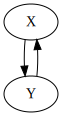

In [4]:
from graphviz import Source
Source('digraph{X->Y ; Y-> X}')

在ICM中任何节点包含两种信息： 
- predictive coding 信息 $x$, 这中信息用于决定 $Ch(X)$ 的分布，并且对于定义信息干预 $\sigma(X=x^*)$.
- 当前节点的分布信息 $X$, 用于通过采样 $x^*$ 像其 $Ch(X)$ 发送信号，确定其子节点的编码信息是否更新。

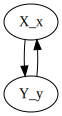

In [22]:
from graphviz import Source
Source('digraph{X_x->Y_y ; Y_y-> X_x}')

具体来说就是 

$$
y \rightarrow (X \sim p(x|y)) \\
Y  \text{ i.i.d samples when 检测到 y updated} \rightarrow \text{决定是否update } x 
$$

也就是信息干预 $\sigma(y^*)$ 会让 $X$ 更新，而 $x$ 不一定更新。

我们的策略是一旦检测到 preditive coding 信息变动，就立刻自动更新收到影响的节点。

## Link Model to Data

如何把数据和ICM联系起来是核心问题。

假设所有的数据都来源于一个 ICM with predictive coding $(x, y)$ and $X\sim p(x|y), Y \sim p(y|x)$ 的某个信息干预 $\sigma(A), A \in \mathscr{P}(\{X, Y\})$ 的干预分布。

在信息干预 $\sigma(A)$ 之下，假如 $A = \{X\}$, 都我们会抽取样本 $x^* \sim X$，通过 DCSampling 的过程判定是否 update ($g(x^*; others) \leq U$ 之类的准则判定是否更新，$r(x^*;others)$ 则是如果更新，那么更新之后的样本是什么）$y$. 然后如果更新了 $y$, 就相当于一个信息干预 $\sigma(Y)$; otherwise, 随机图的构造停止。

那么这里有一个关键问题：

> 对一个联合分布的每个样本，对应着什么样的信息干预呢？

For an ICM with predictive coding $(x, y)$ and $X\sim p(x|y), Y \sim p(y|x)$, $\sigma(A)$ 完全决定了生成的随机函数。然后每个样本都对应某个 $\sigma(A)$，所以这是一个 local random variables 的问题！那么我们可以采用重参数化的技巧，定义一个合适的信息干预集合。

考虑到一般的反馈系统都是相对稳定的，所以 predictive coding 与动态演化后的 predictive coding 差异不应该太大。那么最后的样本数据 $(x^{(i)}, y^{(i)})|(x, y) \rightarrow A$, 

直接干预成为某个值更好？也就是说 $\sigma(a)$，直接更新某些节点的 Predictive coding. $(x^{(i)}, y^{(i)})|(x, y) \rightarrow a^{(i)}$ 在这里 (x, y) 是全局变量，而 $a^{(i)}$ 是可以重参数化的局部变量，是一个开关随机变量。

所以说在我们这里环的处理技巧源自于拒绝采样的思想。把有环图动态的解开成无环图。

## Bayesian 网络

我考虑更加简单的情况来理解我们的信息因果模型（ICM）。

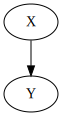

In [23]:
from graphviz import Source
Source('digraph{X->Y}')

在这种情况下 model $(X, Y)$ 的数学表达式为 init **predictive coding** $(x_c, y_c)$ and **info distributions** $X\sim p(x;\Theta), Y \sim p(y|x_c;\Theta)$, 以及局部化变量 $(B_x, B_y)$. 

local r.v. $(B(0, 1; X^{(i)}), B(0, 1; Y^{(i)}))$ for every sample $(X^{(i)}, Y^{(i)})$ . 

> 那么请问 $(X, Y)$ 的联合分布是什么？

对比 VAE：

<img style="text-align:center;" width=200 src="https://pyro.ai/examples/_static/img/vae_model.png"> Variational Autoencoder </img> 

VAE 中每个样本都来自于某一个唯一的分布。

我们的思路是类似的，

- 变分推断中的 $z$ 代表我们的 $(B_x, B_y)$，它具备 guide $B(0, 1, p=0.5)$，它的分布可以重参数化 with logsitic regression given their parents. 
- 变分推断中的 $\theta$ 是全局参数，对应这我们ICM中的 $(x_c, y_c)$，是整个系统一个初始状态信息（当然我们还会有其他的模型参数）。


不同的地方是，潜变量 $B$ 的含义是 info intervention，用于启动一个动态信息图的生成 with respect to the cyclic causal graph。 动态图的生成过程是一个信息传递的过程，是一个因果图的生成过程。

回到 bayesian networks.  $(B_x, B_y) =(1, 0)$ 也就是说，贝叶斯网络的 $root$ 处有信息干预。干预之后，信息节点 $X$ 按照其 preditive coding 进行传播，然后其子节点 100% 接受更新。



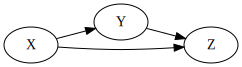

In [1]:
from graphviz import Source
Source('digraph{rankdir=LR; X->Y ->Z ; X-> Z}')

从上图可以看出，虽然 $Z$ 的输入信号并不是同步到达，但是和同步到达的分布没有区别。 这就确认了我们一个原则，那就是

> 信息干预立刻影响其子节点，而不是等到信息收集之后才处理信息。

这个处理信息原则和贝叶斯网络完全不同。

## 一个节点的信息因果模型

我们再来看看一个更加简单的模型。

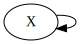

In [27]:
from graphviz import Source
Source('digraph{X->X}')

我们此时的模型是 $(X, x_c, Z), X \sim p(x|x_c)$ 此模型很 VAE 非常相似，此 $Z^{(i)}$ 服从某个 0，1分布，是一个局部变量。决定了某个具体的样本的动态信息传播图。

    step 1. 采样 z ~ Z
    step 2. if z = 0, 则返回 x_c; else z=1, 则抽样 x ~ X
    step 3. sample u ~ U(0, 1), if g(x) < u, accept and update x_c with x; esle reject and return
    step 4. Check if x_c is updated, then sample z ~ Z; goto step 2
    step 5. Sample x ~ p(x|x_c)

这个步骤中一个关节步骤是设计拒绝采样函数。

我的算法非常像大脑，大脑并不仅仅在预测世界，它也在接收信息并抽象出规律，再用规律来处理新接收的信息而已，同时顺便修正一下自己。

当样本数据是 i.i.d 当时候，one node with feedbacks, 一个足够复杂的刷选函数能让它模拟任何分布吗？

采样 $z$~$Z$ 其实相当于一次反思与不反思的随机变量，其不同的反思比例会导致不同的样本分布。

### 能量衰减

信号的传递需要能量，信号不能一直在某个 loop 中传递，我们需要一个能量正则因子来控制传递的次数。

- 直接的处理办法是，设定每个 preditive coding $x_c$ 的最大更新次数 $N$, 每次更新减少一格能量。
- 间接的办法是构建一个适应的能量控制器，来控制发出的信息。


具体来说就是就是把下面步骤

    step 4. Check if x_c is updated, then sample z ~ Z; goto step 2
    
变成

    step 4‘. Check if x_c is updated, 来一些动态控制程序V决定是否 sample z ~ Z; if yes, goto step 2; else return.
    
那么 $V$ 是一个与能量相关的量，能量越高，抽样的可能性越大。初始能量是多少，能量如何更新这是另外的问题了。

## 值得思考

我们的模型的每个节点都是 $n$ 维，那么我们在每个维度上都有一个因果图。对于任何一个节点 $X_v = (X_{v[1]}, \cdots, X_{v[n]})$, 该节点信息 $x_v$ 传播与否被某个策略 $Z_{v[i]}$ 可以被其他维度信息 $x_{v[/i]}$ 影响，但是不改变维度 $i$ 之间的因果关系。这就是非因果的相关性。


我们现在要解释一个观点：

> 常见模型都是 ICM 的特例。

包括 VAE，Bayesian Networks, Reinforcement Learning (with feedbacks), PID 控制系统，图网络，Markov models, MRF, 高斯混合模型等概率图模型， RNN，注意力机制， transformers, 脉冲神经网络。

News: *望月新一最近终于发表了他的ABC参想的证明，2012 年就发布的证明，现在才发表，依旧没有几个人看懂，内心有点冲动，好想放下所有的事情，专心研究它几个月！*